# Découvrons Pandas

Pandas est une librairie qui permet de préparer, arranger, combiner, et analyser de grands volumes de données. Pandas repose sur NumPy ce qui permet de travailler facilement avec des tableaux (Series dans Pandas) ou des matrices (DataFrames). Ces derniers sont plus *optimisés* que le type natif. Pandas et NumPy sont donc habituellement utilisés conjointement.

Note : la déclaration suivante sert à importer les fichiers ressources utilisés plus bas.

In [1]:
comptage_path = '../assets/comptage-voyageurs-trains-transilien.csv'
trips_path = '../assets/Horaires_lignes_transilien/trips.csv'
routes_path = '../assets/Horaires_lignes_transilien/routes.csv'

## Installation de Pandas
Pandas est une librairie scientifique Python. Sous un système Linux, vous pouvez l’installer avec `pip`. Sous Windows ou Mac Os, vous utiliserez [Anaconda](https://www.anaconda.com).
Les modules qui utilisent Pandas commencent habituellement par les lignes :

In [2]:
import pandas as pd
import numpy as np

## Pandas, les DataFrames, Series et les indexes
Dans Pandas, un `DataFrame` est une matrice qui peut être comparée à un tableur. Les lignes ou colonnes sont des `Series`.
Un index est une liste d’entiers (`int`) ou labels (`str`) qui identifie de manière unique une ligne ou une colonne. Les Series sont toujours indexées.
Une série est un objet créé à l’aide d’un constructeur qui accepte en paramètre une collection. La série créée de cette manière voit ses valeurs indexés avec un entier.

In [3]:
pd.Series(range(1, 5))

0    1
1    2
2    3
3    4
dtype: int64

L’index peut être spécifié ainsi que le nom de la série.

In [4]:
pd.Series(range(1, 5), index=["un", "deux", "trois", "quatre"], name="ma_serie")

un        1
deux      2
trois     3
quatre    4
Name: ma_serie, dtype: int64

## Accéder à un élément
On peut accéder à un élément d’une série à partir de son label ou de son indice.

In [5]:
my_serie = pd.Series(range(1, 5), index=["un", "deux", "trois", "quatre"], name="ma_serie")
print(my_serie[0])
print(my_serie['trois'])

1
3


Il est également possible d’utiliser le slicing avec les Series.

In [6]:
print(my_serie['un' : 'trois'])
print(my_serie[0:3])

un       1
deux     2
trois    3
Name: ma_serie, dtype: int64
un       1
deux     2
trois    3
Name: ma_serie, dtype: int64


Pandas permet également l'accès par les indices spécifiques.

In [7]:
print(my_serie[[0,3]])
print(my_serie[['un', 'trois', 'deux']])

un        1
quatre    4
Name: ma_serie, dtype: int64
un       1
trois    3
deux     2
Name: ma_serie, dtype: int64


On peut appliquer des fonctions méthématiques directement sur les Series et certaines sont disponibles sous forme de *raccourcis*.

In [8]:
my_serie.sum()

10

On peut appliquer des opérations sur deux séries comme additionner deux séries, mais pour cela, leur indexes doivent être alignés.

In [9]:
other_serie = pd.Series(np.random.rand(4), index=['trois', 'quatre', 'cinq', 'six'], name='Autre serie')

my_serie + other_serie

cinq           NaN
deux           NaN
quatre    4.121559
six            NaN
trois     3.313830
un             NaN
dtype: float64

Pandas réalise l'union avant l'opération. Les valeurs manquantes ont été remplacées par un `NaN` (Not a number).

Pandas propose des méthodes permétant par exemple de remplacer les valeur manquantes (ici par 0)

In [10]:
my_serie.add(other_serie, fill_value=0)

cinq      0.764172
deux      2.000000
quatre    4.121559
six       0.696084
trois     3.313830
un        1.000000
dtype: float64

Mais si les indexes sont insignifiants et seul les valeurs nous intéressent, alors on peut supprimer les indexes

In [11]:
my_serie.reset_index(drop=True) + other_serie.reset_index(drop=True)

0    1.313830
1    2.121559
2    3.764172
3    4.696084
dtype: float64

## Créer des DataFrames à partir de séries
Un DataFrame est un *tableau*. On peut créer un DataFrame à partir de l'association de séries qui ont des indexes partagés. La classe DataFrame permet ceci par son constructeur.

In [12]:
pd.DataFrame({'First':my_serie.reset_index(drop=True), 'Other':other_serie.reset_index(drop=True)})

,First,Other
0,1,0.313830
1,2,0.121559
2,3,0.764172
3,4,0.696084


## L'import de données
Pandas est capable d'importer des données à partie de la plupart des formats courants. Ci-dessous nous chargeons un fichier csv issu de l'OpenData de la SNCF en csv et affichons les 5 premières lignes.

In [13]:
df = pd.read_csv(comptage_path,
            sep=";")
df.head()

,Nom gare,Code gare,Type de jour,Date de comptage,Ligne,Tranche_horaire,Montants
0,La Ferté sous Jouarre,87116517,Samedi,2010-06-05,P,Entre 16h et 20h,182
1,La Ferté sous Jouarre,87116517,Samedi,2010-06-05,P,Après 20h,72
2,La Frette Montigny,87381871,Dimanche,2012-06-17,J,Entre 16h et 20h,181
3,La Frette Montigny,87381871,Dimanche,2012-06-17,J,Après 20h,50
4,La Frette Montigny,87381871,Samedi,2012-06-16,J,Entre 10h et 16h,332


Chaque colonne est une `Serie` et peut être accédée comme un élément du DataFrame

In [14]:
df['Nom gare'].head()

0    La Ferté sous Jouarre
1    La Ferté sous Jouarre
2       La Frette Montigny
3       La Frette Montigny
4       La Frette Montigny
Name: Nom gare, dtype: object

La méthode `describe` donne un apperçu rapide (sous forme d'une `Series`) : le nombre de données, la moyenne globale, la déviation standard, le minimum, les quartiles et le maximum de la Serie

In [15]:
df['Montants'].describe()

count     6376.000000
mean       935.599906
std       2705.164831
min          0.000000
25%         35.000000
50%        178.500000
75%        720.000000
max      54000.000000
Name: Montants, dtype: float64

Pour les valeurs autre que numériques, `describe` retourne le nombre de données, le nombre d'éléments uniques, la valeur la plus fréquente et son nombre d'occurences.

In [16]:
df['Nom gare'].describe()

count                   6376
unique                   382
top       Paris Saint-Lazare
freq                      70
Name: Nom gare, dtype: object

Pandas permet de grouper les données

In [17]:
df.groupby(['Nom gare', 'Type de jour']).aggregate([np.mean, np.sum]).head(6)

Code gare            Montants      
                                        mean        sum     mean   sum
Nom gare              Type de jour                                    
Ablon                 Dimanche      87545269  437726345    179.2   896
                      JOB           87545269  437726345    462.2  2311
                      Samedi        87545269  437726345    259.0  1295
Achères Grand Cormier Dimanche      87386052  436930260     38.6   193
                      JOB           87386052  436930260     82.0   410
                      Samedi        87386052  436930260     44.0   220

Ici, nous avons la création d'un *MultiIndex* qui permet d'organiser les données par catégorie/niveau et précisions 6 lignes d'affichage pour avoir tous les éléments.

Pandas permet de créer de nouveaux `DataFrame` à partir des données d'un DataFrame.

In [18]:
pd.DataFrame(df.groupby(['Nom gare'])['Montants'].count()) \
    .sort_values('Montants', ascending=False).head()

,Montants
Nom gare,
Paris Saint-Lazare,70
Mantes la Jolie,69
Paris Nord,58
Houilles Carrières sur Seine,46
Pontoise,45


Pandas permet également d'extraire des informations de ce nouveau DataFrame

In [19]:
df.groupby(['Nom gare'])['Montants'].describe()

,count,mean,std,min,25%,50%,75%,max
Nom gare,,,,,,,,
Ablon,15.0,300.133333,305.015659,5.0,69.5,218.0,453.50,1135.0
Achères Grand Cormier,15.0,54.866667,44.085739,3.0,23.5,46.0,86.50,149.0
Achères Ville,18.0,593.611111,545.500864,2.0,161.0,564.5,806.25,1990.0
Allée de la Tour Rendez-Vous,15.0,160.266667,158.469225,3.0,38.0,114.0,274.00,427.0
Andrésy,15.0,98.933333,128.755841,2.0,20.0,49.0,125.00,502.0
...,...,...,...,...,...,...,...,...
Viry Châtillon,15.0,379.466667,306.647277,9.0,130.0,346.0,641.00,1025.0
Vitry sur Seine,15.0,1069.533333,916.113364,56.0,355.5,851.0,1502.50,3264.0
Vosves,13.0,4.461538,6.983497,0.0,0.0,2.0,4.00,25.0


Bien entendu, on peut réaliser des opérations sur ces extractions

In [20]:
pd.DataFrame(df.groupby(['Nom gare'])['Montants'].sum()) \
    .sort_values('Montants', ascending=False).head()

,Montants
Nom gare,
Paris Nord,673992
Paris Saint-Lazare,327838
Paris Gare de Lyon,212767
Magenta,155686
Haussmann Saint-Lazare,139537


In [21]:
pd.DataFrame(df.groupby(['Date de comptage', 'Nom gare'])['Montants'].sum()) \
    .sort_values('Montants', ascending=False).head()

,,Montants
Date de comptage,Nom gare,
2014-03-27,Paris Nord,161746
2014-03-29,Paris Nord,107128
2011-01-27,Paris Gare de Lyon,84653
2014-03-30,Paris Nord,80988
2012-09-13,Haussmann Saint-Lazare,78341


In [22]:
tripsDF = pd.read_csv(trips_path)
tripsDF.head(10)

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id
0,DUA800853021,9309,DUASN124687F05002-1_442440,POVA,0,NaN
1,DUA800853021,9310,DUASN124699F02001-1_442441,POVA,0,NaN
2,DUA800853021,9310,DUASN124677F02001-1_442442,POVA,0,NaN
3,DUA800853021,9310,DUASN124679F03001-1_442443,POVA,0,NaN
4,DUA800853021,9309,DUASN124677F02002-1_442444,POVA,0,NaN
5,DUA800853021,9311,DUASN124697F02003-1_442445,POTA,0,NaN
6,DUA800853021,9312,DUASN124691F02001-1_442446,POVA,0,NaN
7,DUA800853021,9312,DUASN124687F06001-1_442447,POVA,0,NaN
8,DUA800853021,8514,DUASN124703F03001-1_442448,POTA,0,NaN
9,DUA800853021,9311,DUASN124693F09002-1_442449,POTA,0,NaN


In [23]:
routesDF = pd.read_csv(routes_path)
routesDF.head(10)

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,DUA800853021,DUA853,H,Gare du Nord - Pontoise / Luzarches / Beauvais...,NaN,2,NaN,7B4339,FFFFFF
1,DUA800854541,DUA854,J,Gare St-Lazare - Ermont Eaubonne / Vernon / Gi...,NaN,3,NaN,CDCD00,FFFFFF
2,DUA800853522,DUA853,K,Gare du Nord - Crépy en Valois,NaN,3,NaN,C7B300,FFFFFF
3,DUA800854542,DUA854,L,Gare St-Lazare - Versailles R. Droite / Cergy ...,NaN,3,NaN,7584BC,FFFFFF
4,DUA800853521,DUA853,H,Gare du Nord - Pontoise / Luzarches / Beauvais...,NaN,3,NaN,7B4339,FFFFFF
5,DUA800804581,DUA804,D,Creil - Corbeil Essonnes / Melun / Malesherbes,NaN,3,NaN,5E9620,FFFFFF
6,DUA800805591,DUA805,E,Haussmann Saint-Lazare - Chelles Gournay / Tou...,NaN,3,NaN,BD76A1,FFFFFF
7,DUA800855548,DUA855,U,La Défense Grande Arche - La Verrière,NaN,3,NaN,D60058,FFFFFF
8,DUA800850509,DUA850,T4,Aulnay sous Bois - Bondy,NaN,3,NaN,FFBF00,FFFFFF
9,DUA800850011,DUA850,P,Gare de l'Est - La Ferté Milon / Château-Thier...,NaN,2,NaN,F0B600,FFFFFF


In [24]:
top_routes = pd.DataFrame(tripsDF.groupby(['route_id'])['service_id'].count()) \
    .sort_values('service_id', ascending=False)
top_routes.head()

,service_id
route_id,
DUA810801041,3097
DUA800803071,2783
DUA810802061,2434
DUA800854042,2101
DUA800853021,1501


In [25]:
pd.merge(tripsDF, routesDF, on='route_id')

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,DUA800853021,9309,DUASN124687F05002-1_442440,POVA,0,NaN,DUA853,H,Gare du Nord - Pontoise / Luzarches / Beauvais...,NaN,2,NaN,7B4339,FFFFFF
1,DUA800853021,9310,DUASN124699F02001-1_442441,POVA,0,NaN,DUA853,H,Gare du Nord - Pontoise / Luzarches / Beauvais...,NaN,2,NaN,7B4339,FFFFFF
2,DUA800853021,9310,DUASN124677F02001-1_442442,POVA,0,NaN,DUA853,H,Gare du Nord - Pontoise / Luzarches / Beauvais...,NaN,2,NaN,7B4339,FFFFFF
3,DUA800853021,9310,DUASN124679F03001-1_442443,POVA,0,NaN,DUA853,H,Gare du Nord - Pontoise / Luzarches / Beauvais...,NaN,2,NaN,7B4339,FFFFFF
4,DUA800853021,9309,DUASN124677F02002-1_442444,POVA,0,NaN,DUA853,H,Gare du Nord - Pontoise / Luzarches / Beauvais...,NaN,2,NaN,7B4339,FFFFFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21144,DUA810802561,9094,DUASN498105R01003-1_28021,98105,1,NaN,DUA802,Aéroport C,Aéroport Charles de Gaulle 1 (Terminal 1 - Ter...,NaN,3,NaN,000000,FFFFFF
21145,DUA810802561,10410,DUASN498103R01004-1_28022,98103,1,NaN,DUA802,Aéroport C,Aéroport Charles de Gaulle 1 (Terminal 1 - Ter...,NaN,3,NaN,000000,FFFFFF
21146,DUA810802561,9094,DUASN498103R01003-1_28023,98103,1,NaN,DUA802,Aéroport C,Aéroport Charles de Gaulle 1 (Terminal 1 - Ter...,NaN,3,NaN,000000,FFFFFF
21147,DUA810802561,10410,DUASN498101R01004-1_28024,98101,1,NaN,DUA802,Aéroport C,Aéroport Charles de Gaulle 1 (Terminal 1 - Ter...,NaN,3,NaN,000000,FFFFFF


In [26]:
pd.DataFrame(pd.merge(tripsDF, routesDF, on='route_id').groupby(('route_long_name'))['service_id'].count())\
 .sort_values('service_id', ascending=False)

,service_id
route_long_name,
Pontoise / Versailles R. Gauche / St-Quentin en Y. - Versailles Ch. / Dourdan la F. / St-Martin d'E,3261
Cergy Le Haut / Poissy / St-Germain-en-Laye - Marne-la-Vallée Chessy Disneyland / Boissy-St-Léger,3097
Aéroport CDG 2 / Mitry Claye - Robinson / St-Rémy lès Chevreuse,2434
Gare St-Lazare - Ermont Eaubonne / Vernon / Gisors,2380
Gare du Nord - Pontoise / Luzarches / Beauvais / Creil,2264
Gare St-Lazare - Versailles R. Droite / Cergy Le Haut / Noisy le-Roi / St-Germain-en-Laye GC,2181
Creil - Corbeil Essonnes / Melun / Malesherbes,1021
Haussmann Saint-Lazare - Chelles Gournay / Tournan,971
T11,727


## Graphiques avec Matplotlib

In [27]:
import matplotlib
import seaborn

matplotlib.rcParams['figure.figsize'] = 5, 4
seaborn.set_style('whitegrid')

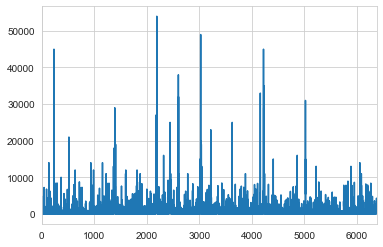

In [28]:
df['Montants'].plot()

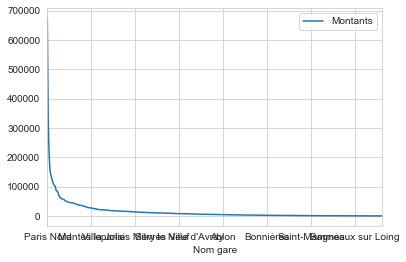

In [29]:
pd.DataFrame(df.groupby('Nom gare')['Montants'].sum()) \
    .sort_values('Montants', ascending=False).plot()